In [1]:
import warnings
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#43768720


## Shapes

In [3]:
shapes = pd.read_csv('../data/raw/GTFS_INTEGRA_SALVADOR2/shapes.txt', sep=',')
shapes.head()

shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  shape_dist_traveled
0  26082_I    -12.931634    -38.444313                  0                  NaN
1  26082_I    -12.931602    -38.444294                  1                  NaN
2  26082_I    -12.931561    -38.444290                  2                  NaN
3  26082_I    -12.931520    -38.444305                  3                  NaN
4  26082_I    -12.931504    -38.444317                  4                  NaN

## GTFS

In [4]:
gtfs = pd.read_parquet('../data/raw/gtfs_bus_topique_02_2024.parquet')
gtfs.head()

linha_atend linha cod_ate sentido    shape  ordem   stop_id        lat  \
0  1321_12432  1321   12432       I  12432_I      1  45833944 -12.929167   
1  1321_12432  1321   12432       I  12432_I      2  44784089 -12.926615   
2  1321_12432  1321   12432       I  12432_I      3  45833505 -12.925073   
3  1321_12432  1321   12432       I  12432_I      4  44165028 -12.923343   
4  1321_12432  1321   12432       I  12432_I      5  44783562 -12.920358   

         lon  distancias  acumulado        posicao  
0 -38.437500       0.000      0.000        inicial  
1 -38.436531       0.309      0.309  intermediario  
2 -38.439533       0.353      0.662  intermediario  
3 -38.440968       0.288      0.950  intermediario  
4 -38.442822       0.387      1.337  intermediario

In [5]:
gtfs['len_stop'] = gtfs['stop_id'].apply(lambda x: len(x))

In [6]:
gtfs_bus = gtfs.query("len_stop > 3 ")

In [7]:
# ponto da lapa
linhas_lapa = gtfs.query(" stop_id == '43768720' ").linha.unique()

In [8]:
gtfs_lapa = gtfs.query(" linha in @linhas_lapa ")
gtfs_lapa.shape

(4226, 13)

In [9]:
# obtendo o caminho das linhas
shapes_ids = gtfs_lapa['shape'].unique()
shapes_lapa = shapes.query(" shape_id in @shapes_ids ")
shapes_lapa.shape

(33406, 5)

In [10]:
shapes_lapa

shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  \
9090    28689_I    -12.931566    -38.444408                  0   
9091    28689_I    -12.931546    -38.444492                  1   
9092    28689_I    -12.931567    -38.444492                  2   
9093    28689_I    -12.931589    -38.444496                  3   
9094    28689_I    -12.931620    -38.444485                  4   
...         ...           ...           ...                ...   
299683  71884_V    -12.983346    -38.511597                208   
299684  71884_V    -12.982960    -38.511932                209   
299685  71884_V    -12.982740    -38.511932                210   
299686  71884_V    -12.982949    -38.511524                211   
299687  71884_V    -12.983304    -38.511181                212   

        shape_dist_traveled  
9090                    NaN  
9091                    NaN  
9092                    NaN  
9093                    NaN  
9094                    NaN  
...                     ...  
299683                  NaN  
299684                  NaN  
299685                  NaN  
299686                  NaN  
299687                  NaN  

[33406 rows x 5 columns]

In [24]:
dfs_plot = []
for shape, df_shape in shapes_lapa.groupby(['shape_id']):
    if df_shape.shape[0] > 10:
        dfs_plot.append(df_shape)

In [25]:
shapes_lapa_clean = pd.concat(dfs_plot, ignore_index=True)

In [40]:
shapes_not = ['67357_V', '46770_I', '46770_V', '75494_V', '75494_I', '27372_I', '71556_I', '71556_V', '46769_V']

In [41]:
shapes_lapa_clean = shapes_lapa_clean.query(" shape_id not in @shapes_not ")

In [11]:
cols = ['stop_id', 'lat', 'lon']
gtfs_lapa_stops = gtfs_lapa.pivot_table(index=cols, aggfunc=set).reset_index()[cols]
gtfs_lapa_stops

stop_id        lat        lon
0     100722778 -12.896647 -38.408215
1     101269104 -12.964257 -38.435131
2     107013409 -12.986676 -38.486652
3     107018068 -12.994537 -38.488899
4     107018201 -12.954608 -38.480282
...         ...        ...        ...
1191   89849694 -12.886555 -38.479782
1192   92431632 -13.005211 -38.517838
1193   92431652 -13.003897 -38.519146
1194   98439035 -12.961696 -38.501793
1195   99376726 -12.976062 -38.457607

[1196 rows x 3 columns]

In [12]:
gtfs_un = gtfs_bus.pivot_table(index=cols, aggfunc=set).reset_index()[cols]
gtfs_un

stop_id        lat        lon
0     100009577 -12.901954 -38.419582
1     100722777 -12.899299 -38.407673
2     100722778 -12.896647 -38.408215
3     101214305 -12.870927 -38.433800
4     101269104 -12.964257 -38.435131
...         ...        ...        ...
3860   99834780 -12.937695 -38.486004
3861   99834781 -12.937044 -38.484684
3862   99834782 -12.936999 -38.484497
3863   99834783 -12.936103 -38.483089
3864   99834784 -12.935954 -38.483051

[3865 rows x 3 columns]

In [13]:
gtfs_lapa_stops_lapa = gtfs_lapa_stops.query(" stop_id == '43768720' ")

In [14]:
# plotar todos os pontos

In [21]:
shapes_lapa.head()

shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  \
9090  28689_I    -12.931566    -38.444408                  0   
9091  28689_I    -12.931546    -38.444492                  1   
9092  28689_I    -12.931567    -38.444492                  2   
9093  28689_I    -12.931589    -38.444496                  3   
9094  28689_I    -12.931620    -38.444485                  4   

      shape_dist_traveled  
9090                  NaN  
9091                  NaN  
9092                  NaN  
9093                  NaN  
9094                  NaN

In [45]:
gtfs_lapa_stops

stop_id        lat        lon
0     100722778 -12.896647 -38.408215
1     101269104 -12.964257 -38.435131
2     107013409 -12.986676 -38.486652
3     107018068 -12.994537 -38.488899
4     107018201 -12.954608 -38.480282
...         ...        ...        ...
1191   89849694 -12.886555 -38.479782
1192   92431632 -13.005211 -38.517838
1193   92431652 -13.003897 -38.519146
1194   98439035 -12.961696 -38.501793
1195   99376726 -12.976062 -38.457607

[1196 rows x 3 columns]

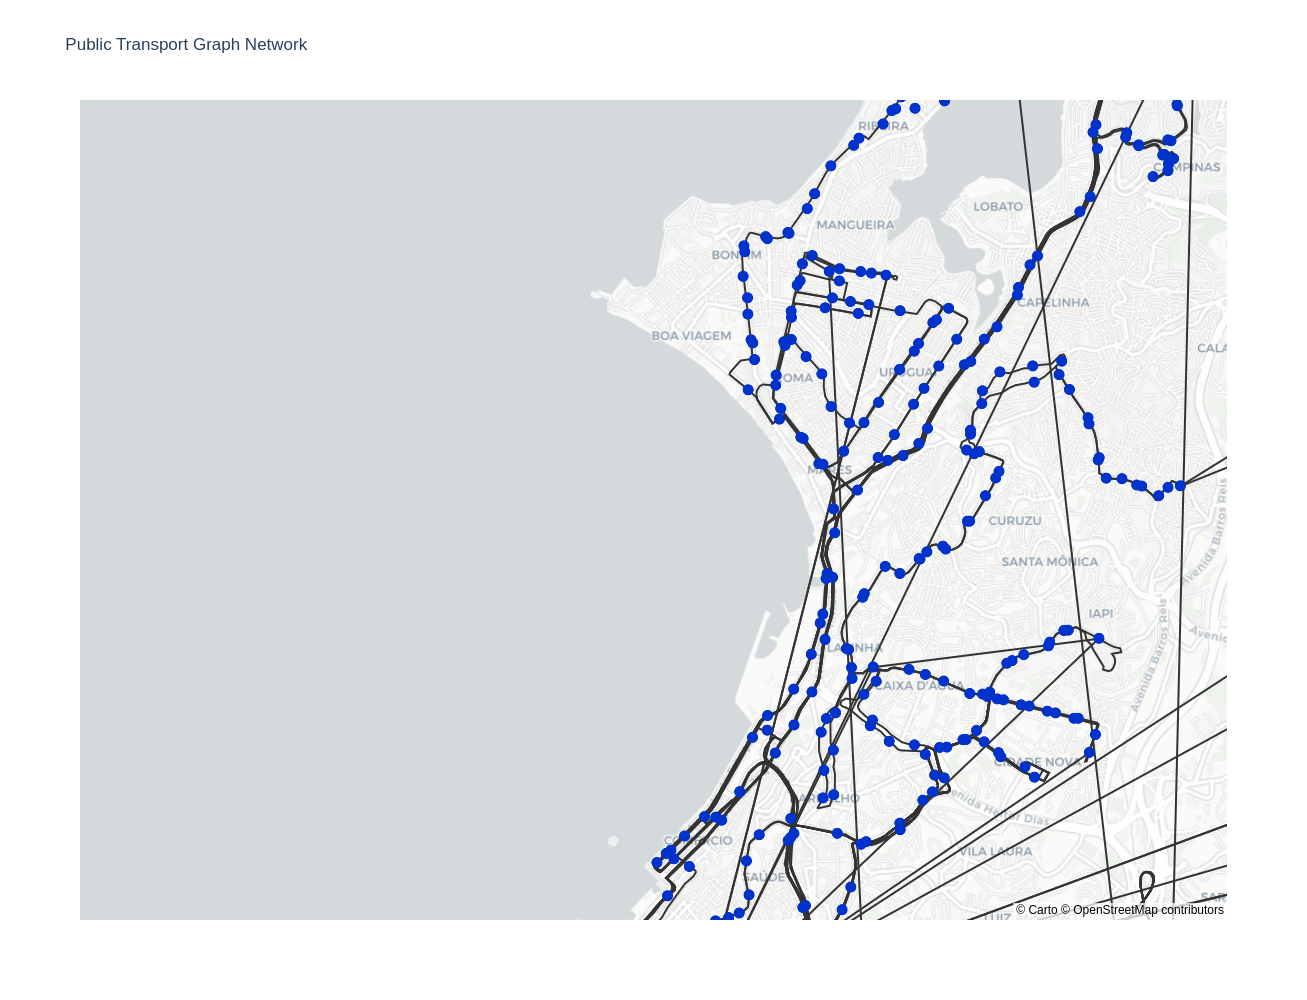

In [48]:
# Crear el trazo de los nodos

# node_trace_lapa = go.Scattermapbox(
#     lat=gtfs_lapa_stops_lapa.lat,
#     lon=gtfs_lapa_stops_lapa.lon,
#     mode='lines',
#     marker=dict(
#         size=30,
#         color='#92a8d1'
#     ),
# )

node_trace = go.Scattermapbox(
    lat=gtfs_lapa_stops.lat,
    lon=gtfs_lapa_stops.lon,
    mode='markers',
    marker=dict(
        size=12,
        color='#0033cc'
    ),
)


# shapes_trace = go.Scattermapbox(
#     lat=shapes_lapa_clean.shape_pt_lat,
#     lon=shapes_lapa_clean.shape_pt_lon,
#     text=shapes_lapa_clean.shape_id,
#     mode='lines',
#     marker=dict(
#         size=3,
#         color='#333333'
#     ),
# )

shapes_trace = go.Scattermapbox(
    lat=shapes_lapa_clean.shape_pt_lat,
    lon=shapes_lapa_clean.shape_pt_lon,
    text=shapes_lapa_clean.shape_id,
    mode='lines',
    marker=dict(
        size=3,
        color='#333333'
    ),
)

# Crear la figura
#fig = go.Figure(data=[node_trace_lapa, node_trace, shapes_trace])
fig = go.Figure(data=[shapes_trace, node_trace])


fig.update_layout(
    title='Public Transport Graph Network',
    showlegend=False,
    height=1000,
    width=1000,
    mapbox=dict(
        style='carto-positron',
        center=dict(lat=-12.902925, lon=-38.418237), 
        zoom=12
    ),
)

fig.show()

## BRT

In [16]:
brt = pd.read_parquet('../data/raw/stations_b1_to_b3_unique.parquet')
brt.head()

stop_id                     station                            end  \
0       1  PRAÇA NOSSA SENHORA DA LUZ                 "R. Pernambuco   
1       2        PRAÇA BELO HORIZONTE     "Rua Rio Grande Do Sul 179   
2       3      ESTAÇÃO RODOVIÁRIA SUL            "Av. Tancredo Neves   
3       4         ESTAÇÃO HIPER (IDA)                       "Av. ACM   
4       5      ESTAÇÃO CIDADELA (IDA)  "Rua Senador Theotônio Vilela   

         lat        lon stop_name     linha  
0 -13.005406 -38.457510   pra_nos     B2-B3  
1 -13.004483 -38.458888    pra_bh        B2  
2 -12.979102 -38.463883   est_rod  B1-B2-B3  
3 -12.984652 -38.466868   est_hip     B1-B2  
4 -12.989111 -38.471376   est_cid     B1-B2

In [57]:
brt.stop_name.nunique()

17

## Metro

In [17]:
subway = pd.read_parquet('../data/raw/subway_stations_05_2024.parquet')
subway.head()

ESTAÇÃO             DESCRIÇÃO  \
0     ANR  ESTAÇÃO ACESSO NORTE   
1     ARP     ESTAÇÃO AEROPORTO   
2     BNC        ESTAÇÃO BONOCÔ   
3     BTS        ESTAÇÃO BROTAS   
4     CAB           ESTAÇÃO CAB   

                                            ENDEREÇO   LATITUTE  LONGITUDE  
0       AVENIDA RUA DOS RODOVIARIOS S/N, BARROS REIS -12.968859 -38.477207  
1    AVENIDA SANTOS DUMONT, S/N,  ESTRADA  DO COCO,  -12.904170 -38.341185  
2                AVENIDA MARIO LEAL FERREIRA, BROTAS -12.983797 -38.483630  
3  AVENIDA TV. AMARAL MUNIZ, METRÔ VIAD. F. COSTA... -12.979335 -38.499113  
4         AVENIDA ANTONIO CARLOS MAGALHÃES S/N , CAB -12.955643 -38.428988

In [55]:
subway['ESTAÇÃO'].nunique()

21

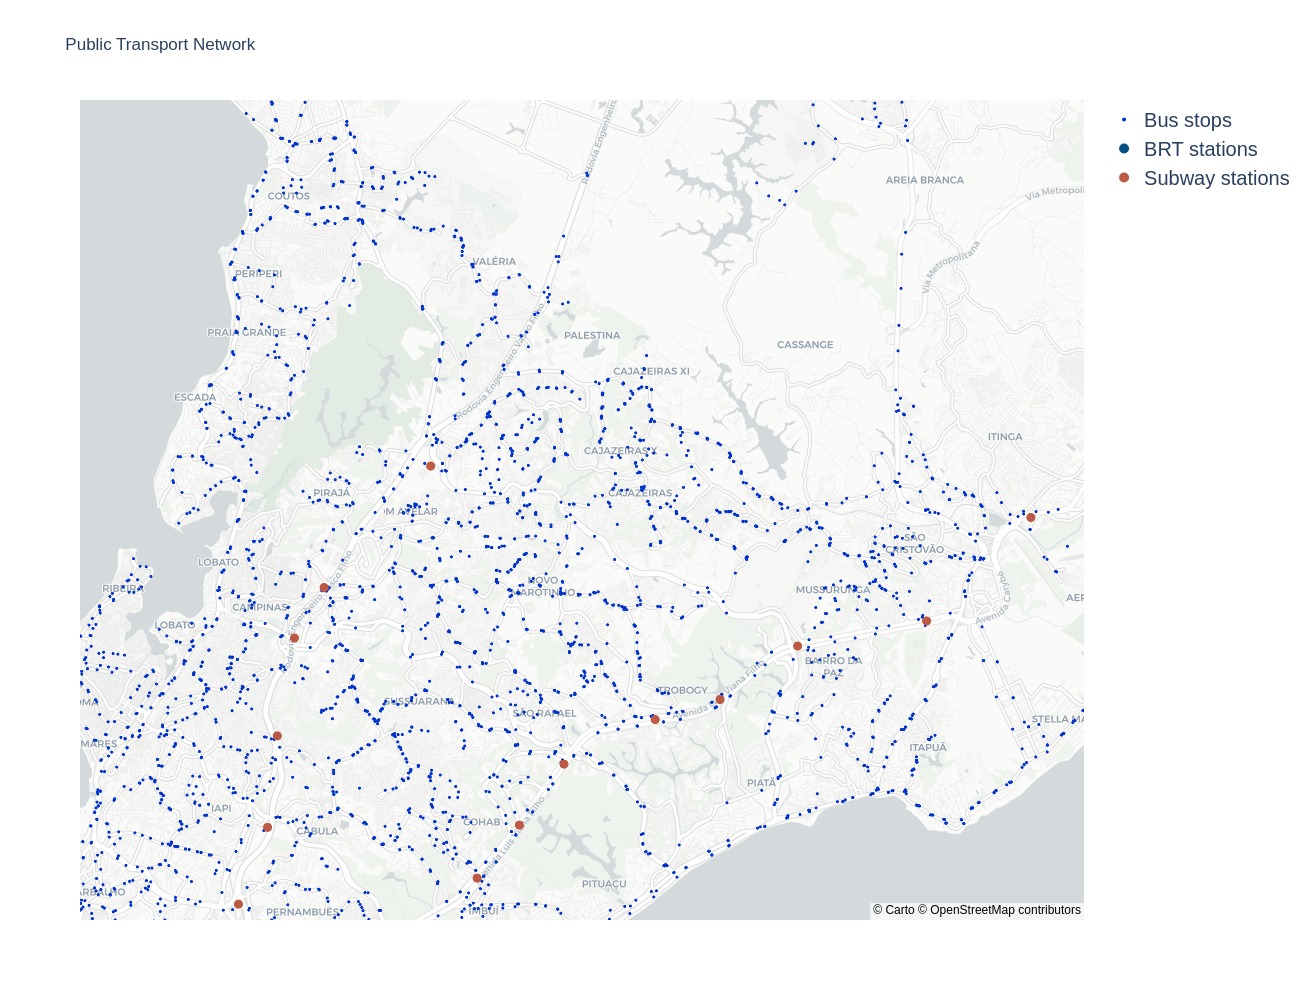

In [54]:
# Crear el trazo de los nodos


bus_trace = go.Scattermapbox(
    lat=gtfs_un.lat,
    lon=gtfs_un.lon,
    mode='markers',
    marker=dict(
        size=4,
        color='#0033cc'
    ),
    name='Bus stops'
)


brt_trace = go.Scattermapbox(
    lat=brt.lat,
    lon=brt.lon,
    mode='markers',
    marker=dict(
        size=10,
        color='#034f84'
    ),
    name='BRT stations'
)

metro_trace = go.Scattermapbox(
    lat=subway.LATITUTE,
    lon=subway.LONGITUDE,
    mode='markers',
    marker=dict(
        size=10,
        color='#bc5a45'
    ),
    name='Subway stations'
)

# Crear la figura
fig = go.Figure(data=[bus_trace, brt_trace, metro_trace])

fig.update_layout(
    title='Public Transport Network',
    showlegend=True,
    legend=dict(font=dict(size=20)),
    height=1000,
    width=1000,
    mapbox=dict(
        style='carto-positron',
        center=dict(lat=-12.902925, lon=-38.418237), 
        zoom=12
    ),
)

fig.show()

In [52]:
?fig.update_layout

Signature: fig.update_layout(dict1=None, overwrite=False, **kwargs) -> 'Figure'
Docstring:
Update the properties of the figure's layout with a dict and/or with
keyword arguments.

This recursively updates the structure of the original
layout with the values in the input dict / keyword arguments.

Parameters
----------
dict1 : dict
    Dictionary of properties to be updated
overwrite: bool
    If True, overwrite existing properties. If False, apply updates
    to existing properties recursively, preserving existing
    properties that are not specified in the update operation.
kwargs :
    Keyword/value pair of properties to be updated

Returns
-------
BaseFigure
    The Figure object that the update_layout method was called on
File:      /opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_figure.py
Type:      method
